## Regression with max pooling

### Import and env settings

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt

import os

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

### Variables/parameters used in this notebook

In [3]:
file = '../../data/home_sale_data_324_features_raw_price.csv'

ckpt_path = "./ckpt/reg_lr005/"
os.makedirs(ckpt_path, exist_ok=True)

lr = 0.005
epochs = 120

### Prepare data

In [4]:
data = pd.read_csv(file)

'''suffle rows randomly'''
data = data.sample(frac=1)

labels = data['label']

data.head()

,OverallQual,GrLivArea,TotalSF,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,TotRmsAbvGrd,hasfireplace,ExterQual_Gd,BsmtQual_Ex,Fireplaces,HeatingQC_Ex,MasVnrArea,Total_porch_sf,BsmtFinType1_GLQ,KitchenQual_Ex,OpenPorchSF,GarageFinish_Fin,...,BsmtExposure_No,Neighborhood_OldTown,Foundation_BrkTil,GarageFinish_None,GarageCond_None,GarageQual_None,GarageType_None,MSSubClass_30,LotShape_Reg,PavedDrive_N,Foundation_CBlock,MSZoning_RM,HeatingQC_TA,CentralAir_N,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3,label
963,0.222222,0.394045,0.208333,0.0,0.001104,0.000000,0.157895,0.187149,0.239834,0.275362,0.25,0.000000,0.0,0.516936,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,37900.00
669,0.555556,0.455198,0.229732,0.2,0.163872,0.258064,0.526316,0.354336,0.501653,0.673913,0.25,0.250000,0.0,0.421336,1.0,0.0,0.0,0.293793,0.0,0.0,0.461628,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,140000.00
1811,0.555556,0.503533,0.276200,0.2,0.163872,0.188172,0.494737,0.194635,0.281376,0.326087,0.25,0.950000,0.0,0.421336,1.0,0.0,0.0,0.293793,1.0,0.0,0.103898,0.0,1.0,0.378065,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,133284.77
1912,0.444444,0.586532,0.319898,0.4,0.327743,0.451613,0.800000,0.493450,0.640997,0.862319,0.50,0.683333,1.0,0.421336,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,155234.50
528,0.444444,0.334376,0.000184,0.2,0.001104,0.263441,0.694737,0.000000,0.371392,0.601449,0.25,0.950000,0.0,0.421336,1.0,0.0,0.0,0.293793,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,107500.00


In [5]:
# drop label column
data.drop(['label'], axis=1, inplace=True)
data.describe()

,OverallQual,GrLivArea,TotalSF,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,TotRmsAbvGrd,hasfireplace,ExterQual_Gd,BsmtQual_Ex,Fireplaces,HeatingQC_Ex,MasVnrArea,Total_porch_sf,BsmtFinType1_GLQ,KitchenQual_Ex,OpenPorchSF,GarageFinish_Fin,...,Neighborhood_IDOTRR,BsmtExposure_No,Neighborhood_OldTown,Foundation_BrkTil,GarageFinish_None,GarageCond_None,GarageQual_None,GarageType_None,MSSubClass_30,LotShape_Reg,PavedDrive_N,Foundation_CBlock,MSZoning_RM,HeatingQC_TA,CentralAir_N,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3
count,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,...,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.0,2911.0,2911.0
mean,0.565136,0.542763,0.293431,0.353143,0.200863,0.317285,0.660811,0.326706,0.487996,0.719569,0.391876,0.570892,0.447956,0.542786,0.512882,0.335967,0.087255,0.171718,0.511508,0.159954,0.203170,0.290622,0.069392,0.176542,0.245620,...,0.031261,0.652697,0.082102,0.106493,0.054277,0.054277,0.054277,0.053590,0.047750,0.637582,0.073514,0.423222,0.158708,0.293370,0.066644,0.266919,0.605634,0.421848,0.439368,0.487118,0.511852,0.616627,0.0,0.0,0.0
std,0.155988,0.125193,0.119772,0.152244,0.133043,0.143976,0.242686,0.131930,0.131369,0.219351,0.138140,0.348189,0.497369,0.128554,0.499920,0.472409,0.282257,0.181727,0.499953,0.218350,0.163524,0.454127,0.254163,0.183129,0.430528,...,0.174051,0.476195,0.274568,0.308520,0.226602,0.226602,0.226602,0.225245,0.213273,0.480781,0.261024,0.494155,0.365467,0.455385,0.249447,0.442425,0.488798,0.493939,0.496395,0.499920,0.499945,0.486292,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.444444,0.451636,0.213557,0.200000,0.088659,0.215054,0.473684,0.247193,0.395003,0.590580,0.250000,0.250000,0.000000,0.421336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066964,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,0.555556,0.547807,0.282326,0.400000,0.164976,0.322581,0.652632,0.308172,0.481664,0.731884,0.500000,0.716667,0.000000,0.516936,1.000000,0.000000,0.000000,0.293793,1.000000,0.000000,0.179849,0.000000,0.000000,0.180865,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0
75%,0.666667,0.621247,0.356447,0.400000,0.252530,0.387097,0.905263,0.405490,0.582574,0.934783,0.500000,0.900000,1.000000,0.600315,1.000000,1.000000,0.000000,0.293793,1.000000,0.353218,0.327089,1.000000,0.000000,0.309510,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [6]:
labels.describe()

count      2911.000000
mean     180161.314822
std       78538.134736
min       34900.000000
25%      129082.035000
50%      160200.000000
75%      212000.000000
max      755000.000000
Name: label, dtype: float64

In [7]:
data_np = data.to_numpy()
data_np.shape
data_np = data_np.reshape(len(data), 18, 18)
data_np.shape

(2911, 18, 18)

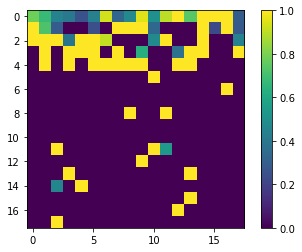

In [8]:
# data_np[0].shape

nArray = np.array(data_np[99])


a11=nArray.reshape(18,18)
plt.imshow(a11)
plt.colorbar()
plt.show()

In [9]:
'''because we don't use one-hot encoding in reggresion, need to change labels from pandas series to np array'''
labels = labels.to_numpy()
labels.shape

(2911,)

In [10]:
all_examples = data_np
all_examples.shape

(2911, 18, 18)

#### train test splitting
- hold out 15% for testing
- use 85% to train model with K-fold CV

In [11]:
ttl_samples = all_examples.shape[0] 
test_ratio = 0.15
test_samples = int(test_ratio * all_examples.shape[0])

train_examples = all_examples[:-1*test_samples]
test_examples = all_examples[-1*test_samples:]
train_labels = labels[:-1*test_samples]
test_labels = labels[-1*test_samples:]


In [12]:
print('train: ', train_examples.shape)
print('test: ', test_examples.shape)
print('train label: ', train_labels.shape)
print('test label: ', test_labels.shape)

train:  (2475, 18, 18)
test:  (436, 18, 18)
train label:  (2475,)
test label:  (436,)


### Prepare model

In [13]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def create_reg_model(lr=0.005):

	# Working
	with tf.device('/cpu:0'):
		data_augmentation = tf.keras.Sequential([ 
			tf.keras.layers.RandomFlip("horizontal", input_shape=(18, 18, 1)),
	  		tf.keras.layers.RandomRotation(0.1),
		    tf.keras.layers.RandomZoom(0.1)
			])


	model = tf.keras.Sequential([
		# data_augmentation,
	  	# tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
	  	tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(18, 18, 1)),
		tf.keras.layers.MaxPooling2D((2, 2)),
		tf.keras.layers.Dropout(0.1),
		tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
	  	tf.keras.layers.MaxPooling2D((2,2)),
		tf.keras.layers.Dropout(0.1),
	  	tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
	  	tf.keras.layers.MaxPooling2D(),
		tf.keras.layers.Dropout(0.1),
		tf.keras.layers.Flatten(),
		tf.keras.layers.Dense(128, activation='relu'),
		tf.keras.layers.Dense(64, activation='relu'),
		tf.keras.layers.Dense(32, activation='relu'),
		tf.keras.layers.Dense(1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
	])

	# opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
	opt = tf.keras.optimizers.Adam(lr=lr)
	model.compile(optimizer=opt, loss=rmse, metrics=[rmse])

	return model


Num GPUs Available:  1


### Test trainging & visualizing result

In [15]:
# model = create_reg_model()
# model.summary()

In [16]:
# history = model.fit(train_examples, train_labels, epochs=epochs, validation_data=(test_examples, test_labels))

In [17]:
# train_rmse = history.history['rmse']
# val_rmse = history.history['val_rmse']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, train_rmse, label='Training RMSE')
# plt.plot(epochs_range, val_rmse, label='Validation RMSE')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Accuracy')


# '''How far are predictions from real values?'''
# from matplotlib.ticker import FuncFormatter

# def format_tick_labels(x, pos):
#     return '{:.0f}k'.format(x/1000)

# predictions = model.predict(test_examples)

# xlims = [0, max(test_labels)*1.1]
# ylims = [0, max(predictions)*1.1]

# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# ax.scatter(test_labels, predictions)
# ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
# ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))
# ax.set_xlim(xlims)
# ax.set_ylim(ylims)
# ax.set_xlabel('Actual Price')
# ax.set_ylabel('Predicted Price')

# ax.plot(xlims, ylims, 'r-')

### K-fold CV Training

In [37]:
from sklearn.model_selection import KFold

# modify to save ckpt for each test
ckpt = os.path.join(ckpt_path, "val_rmse_{val_rmse:.0f}.hdf5")

# training params
epochs = epochs
lr = lr

# the k for k fold CV
n_split = 10

# for recording best performance
min_loss = np.inf
best_history = None

'''
k-fold cross validation
Save the best model using validation accuracy as metric
Print the global best performace when finished
'''
for train_index, test_index in KFold(n_split).split(train_examples):

    x_train, x_vad = train_examples[train_index], train_examples[test_index]
    y_train, y_vad = train_labels[train_index], train_labels[test_index]

    model=create_reg_model(lr)
  
    # callbacks
    checkpoint_filepath = ckpt
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='auto',
        save_best_only=True,
        verbose=1
    )

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=25,
        verbose=1,
        mode='auto',
    )

    # Model weights are saved at the end of every epoch, if it's the best seen so far.
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_vad, y_vad),
                        callbacks=[model_checkpoint_callback, early_stopping_callback])

    val_loss = max(history.history['val_loss'])
    
    if val_loss < min_loss:
        min_loss = val_loss
        best_history = history
        # print('Best acc so far. Saving params...\n')

print('Finish {}-fold cross validation'.format(n_split))
print('Best performing model has {} validation loss (RMSE)'.format(min_loss))



Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-30 13:42:03.871773: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-30 13:42:03.871877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/120


2022-04-30 13:42:04.101359: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-30 13:42:04.425780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 109945.1172 - rmse: 109841.2969

2022-04-30 13:42:05.700307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 58174.08594, saving model to ./ckpt/reg_lr005/val_rmse_57952.hdf5
70/70 [==============================] - 2s 21ms/step - loss: 109945.1172 - rmse: 109841.2969 - val_loss: 58174.0859 - val_rmse: 57951.6250
Epoch 2/120
69/70 [============================>.] - ETA: 0s - loss: 57281.0938 - rmse: 57281.0938
Epoch 2: val_loss improved from 58174.08594 to 42655.10547, saving model to ./ckpt/reg_lr005/val_rmse_42552.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 57147.3828 - rmse: 57057.1953 - val_loss: 42655.1055 - val_rmse: 42551.6367
Epoch 3/120
66/70 [===========================>..] - ETA: 0s - loss: 49642.2344 - rmse: 49642.2344
Epoch 3: val_loss improved from 42655.10547 to 39756.19922, saving model to ./ckpt/reg_lr005/val_rmse_39711.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 49414.0586 - rmse: 49350.2383 - val_loss: 39756.1992 - val_rmse: 39710.7969
Epoch 4/120
70/70 [==============================] - E

2022-04-30 13:43:16.400756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 111305.4844 - rmse: 110982.6953
Epoch 1: val_loss improved from inf to 61463.19531, saving model to ./ckpt/reg_lr005/val_rmse_61084.hdf5
70/70 [==============================] - 1s 14ms/step - loss: 111305.4844 - rmse: 110982.6953 - val_loss: 61463.1953 - val_rmse: 61083.6758
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 57001.0312 - rmse: 57001.0312

2022-04-30 13:43:17.410674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/70 [===========================>..] - ETA: 0s - loss: 57438.4336 - rmse: 57438.4336
Epoch 2: val_loss improved from 61463.19531 to 48898.94141, saving model to ./ckpt/reg_lr005/val_rmse_48820.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 57142.1406 - rmse: 57215.1680 - val_loss: 48898.9414 - val_rmse: 48819.8516
Epoch 3/120
67/70 [===========================>..] - ETA: 0s - loss: 47129.1016 - rmse: 47129.1016
Epoch 3: val_loss did not improve from 48898.94141
70/70 [==============================] - 1s 11ms/step - loss: 46814.2891 - rmse: 46780.0078 - val_loss: 51682.4570 - val_rmse: 51741.2734
Epoch 4/120
68/70 [============================>.] - ETA: 0s - loss: 44277.5273 - rmse: 44277.5273
Epoch 4: val_loss improved from 48898.94141 to 44376.42188, saving model to ./ckpt/reg_lr005/val_rmse_44355.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 44112.1523 - rmse: 43976.6992 - val_loss: 44376.4219 - val_rmse: 44354.6641
Epoch 5/120
67/70 [=====

2022-04-30 13:44:31.816237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 110440.2500 - rmse: 110067.0781
Epoch 1: val_loss improved from inf to 71325.56250, saving model to ./ckpt/reg_lr005/val_rmse_71019.hdf5
70/70 [==============================] - 1s 13ms/step - loss: 110440.2500 - rmse: 110067.0781 - val_loss: 71325.5625 - val_rmse: 71018.5781
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 67919.9297 - rmse: 67919.9297

2022-04-30 13:44:32.794394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 57074.7930 - rmse: 56997.3594
Epoch 2: val_loss improved from 71325.56250 to 57478.50391, saving model to ./ckpt/reg_lr005/val_rmse_57114.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 57074.7930 - rmse: 56997.3594 - val_loss: 57478.5039 - val_rmse: 57113.6133
Epoch 3/120
66/70 [===========================>..] - ETA: 0s - loss: 47021.4492 - rmse: 47021.4492
Epoch 3: val_loss improved from 57478.50391 to 50640.06250, saving model to ./ckpt/reg_lr005/val_rmse_50282.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 47075.9961 - rmse: 47235.6172 - val_loss: 50640.0625 - val_rmse: 50282.4219
Epoch 4/120
68/70 [============================>.] - ETA: 0s - loss: 45493.9609 - rmse: 45493.9609
Epoch 4: val_loss improved from 50640.06250 to 49443.35156, saving model to ./ckpt/reg_lr005/val_rmse_49093.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 45357.4844 - rmse: 45330.6523 - val_lo

2022-04-30 13:46:02.758519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 110421.7812 - rmse: 110113.7969
Epoch 1: val_loss improved from inf to 70914.51562, saving model to ./ckpt/reg_lr005/val_rmse_70315.hdf5
70/70 [==============================] - 1s 14ms/step - loss: 110421.7812 - rmse: 110113.7969 - val_loss: 70914.5156 - val_rmse: 70314.5312
Epoch 2/120
 6/70 [=>............................] - ETA: 0s - loss: 60426.5547 - rmse: 60426.5547

2022-04-30 13:46:03.832698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 57718.1211 - rmse: 57716.2266
Epoch 2: val_loss improved from 70914.51562 to 56452.44922, saving model to ./ckpt/reg_lr005/val_rmse_55864.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 57718.1211 - rmse: 57716.2266 - val_loss: 56452.4492 - val_rmse: 55863.8398
Epoch 3/120
69/70 [============================>.] - ETA: 0s - loss: 46189.8711 - rmse: 46189.8711
Epoch 3: val_loss improved from 56452.44922 to 49770.78906, saving model to ./ckpt/reg_lr005/val_rmse_49342.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 46235.4727 - rmse: 46266.2305 - val_loss: 49770.7891 - val_rmse: 49341.9609
Epoch 4/120
67/70 [===========================>..] - ETA: 0s - loss: 46078.9453 - rmse: 46078.9453
Epoch 4: val_loss did not improve from 49770.78906
70/70 [==============================] - 1s 12ms/step - loss: 45417.5547 - rmse: 45419.8047 - val_loss: 51443.5352 - val_rmse: 50902.5508
Epoch 5/120
68/70 [=====

2022-04-30 13:48:00.744962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 110498.4219 - rmse: 110166.4688
Epoch 1: val_loss improved from inf to 78513.38281, saving model to ./ckpt/reg_lr005/val_rmse_78606.hdf5
70/70 [==============================] - 2s 14ms/step - loss: 110498.4219 - rmse: 110166.4688 - val_loss: 78513.3828 - val_rmse: 78605.5547
Epoch 2/120
 1/70 [..............................] - ETA: 0s - loss: 63333.1367 - rmse: 63333.1367

2022-04-30 13:48:01.845405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/70 [============================>.] - ETA: 0s - loss: 58027.6602 - rmse: 58027.6602
Epoch 2: val_loss improved from 78513.38281 to 69063.08594, saving model to ./ckpt/reg_lr005/val_rmse_69059.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 58119.1484 - rmse: 58179.2266 - val_loss: 69063.0859 - val_rmse: 69059.0938
Epoch 3/120
66/70 [===========================>..] - ETA: 0s - loss: 47603.6016 - rmse: 47603.6016
Epoch 3: val_loss improved from 69063.08594 to 55694.24609, saving model to ./ckpt/reg_lr005/val_rmse_55653.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 47702.9570 - rmse: 47951.9180 - val_loss: 55694.2461 - val_rmse: 55652.5078
Epoch 4/120
70/70 [==============================] - ETA: 0s - loss: 44218.7188 - rmse: 44202.0430
Epoch 4: val_loss improved from 55694.24609 to 47907.19141, saving model to ./ckpt/reg_lr005/val_rmse_47791.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 44218.7188 - rmse: 44202.0430 - val_lo

2022-04-30 13:50:18.013869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 109067.1016 - rmse: 108912.1406

2022-04-30 13:50:20.634234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 60773.07812, saving model to ./ckpt/reg_lr005/val_rmse_61365.hdf5
70/70 [==============================] - 5s 40ms/step - loss: 109067.1016 - rmse: 108912.1406 - val_loss: 60773.0781 - val_rmse: 61364.5938
Epoch 2/120
69/70 [============================>.] - ETA: 0s - loss: 57362.0469 - rmse: 57362.0469
Epoch 2: val_loss improved from 60773.07812 to 49440.53906, saving model to ./ckpt/reg_lr005/val_rmse_50092.hdf5
70/70 [==============================] - 3s 43ms/step - loss: 57541.8164 - rmse: 57648.1328 - val_loss: 49440.5391 - val_rmse: 50092.3594
Epoch 3/120
70/70 [==============================] - ETA: 0s - loss: 47266.0352 - rmse: 47191.1914
Epoch 3: val_loss improved from 49440.53906 to 42367.37109, saving model to ./ckpt/reg_lr005/val_rmse_42659.hdf5
70/70 [==============================] - 3s 40ms/step - loss: 47266.0352 - rmse: 47191.1914 - val_loss: 42367.3711 - val_rmse: 42658.5703
Epoch 4/120
69/70 [============================>.] - E

2022-04-30 13:53:33.300462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 110992.3438 - rmse: 110757.8125

2022-04-30 13:53:35.885895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 69137.73438, saving model to ./ckpt/reg_lr005/val_rmse_68535.hdf5
70/70 [==============================] - 3s 35ms/step - loss: 110992.3438 - rmse: 110757.8125 - val_loss: 69137.7344 - val_rmse: 68534.7422
Epoch 2/120
69/70 [============================>.] - ETA: 0s - loss: 57925.5000 - rmse: 57925.5000
Epoch 2: val_loss improved from 69137.73438 to 47267.86719, saving model to ./ckpt/reg_lr005/val_rmse_46607.hdf5
70/70 [==============================] - 3s 44ms/step - loss: 58264.7422 - rmse: 58465.3711 - val_loss: 47267.8672 - val_rmse: 46606.9023
Epoch 3/120
70/70 [==============================] - ETA: 0s - loss: 47299.6445 - rmse: 47242.4414
Epoch 3: val_loss improved from 47267.86719 to 42581.42969, saving model to ./ckpt/reg_lr005/val_rmse_42128.hdf5
70/70 [==============================] - 3s 46ms/step - loss: 47299.6445 - rmse: 47242.4414 - val_loss: 42581.4297 - val_rmse: 42128.0391
Epoch 4/120
69/70 [============================>.] - E

2022-04-30 13:58:02.577174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 110913.1719 - rmse: 110510.2578

2022-04-30 13:58:06.206991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 68342.46875, saving model to ./ckpt/reg_lr005/val_rmse_68138.hdf5
70/70 [==============================] - 5s 51ms/step - loss: 110913.1719 - rmse: 110510.2578 - val_loss: 68342.4688 - val_rmse: 68138.2344
Epoch 2/120
70/70 [==============================] - ETA: 0s - loss: 58037.2812 - rmse: 57937.2461
Epoch 2: val_loss improved from 68342.46875 to 47010.72656, saving model to ./ckpt/reg_lr005/val_rmse_47053.hdf5
70/70 [==============================] - 5s 65ms/step - loss: 58037.2812 - rmse: 57937.2461 - val_loss: 47010.7266 - val_rmse: 47053.0312
Epoch 3/120
69/70 [============================>.] - ETA: 0s - loss: 47949.2383 - rmse: 47949.2383
Epoch 3: val_loss improved from 47010.72656 to 45273.05859, saving model to ./ckpt/reg_lr005/val_rmse_45191.hdf5
70/70 [==============================] - 5s 78ms/step - loss: 47918.0117 - rmse: 47899.5430 - val_loss: 45273.0586 - val_rmse: 45191.3281
Epoch 4/120
70/70 [==============================] - E

2022-04-30 14:02:16.087788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 109073.8516 - rmse: 108792.9844

2022-04-30 14:02:21.218481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 65593.03125, saving model to ./ckpt/reg_lr005/val_rmse_65813.hdf5
70/70 [==============================] - 6s 69ms/step - loss: 109073.8516 - rmse: 108792.9844 - val_loss: 65593.0312 - val_rmse: 65812.9531
Epoch 2/120
70/70 [==============================] - ETA: 0s - loss: 56238.6797 - rmse: 56102.0664
Epoch 2: val_loss improved from 65593.03125 to 53694.73828, saving model to ./ckpt/reg_lr005/val_rmse_53860.hdf5
70/70 [==============================] - 6s 86ms/step - loss: 56238.6797 - rmse: 56102.0664 - val_loss: 53694.7383 - val_rmse: 53860.3477
Epoch 3/120
69/70 [============================>.] - ETA: 0s - loss: 49847.0938 - rmse: 49847.0938
Epoch 3: val_loss improved from 53694.73828 to 43778.79297, saving model to ./ckpt/reg_lr005/val_rmse_43665.hdf5
70/70 [==============================] - 5s 69ms/step - loss: 50216.1875 - rmse: 50434.4766 - val_loss: 43778.7930 - val_rmse: 43665.0273
Epoch 4/120
69/70 [============================>.] - E

2022-04-30 14:08:24.481016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 107312.1250 - rmse: 106976.3984

2022-04-30 14:08:28.007575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 50500.27734, saving model to ./ckpt/reg_lr005/val_rmse_51135.hdf5
70/70 [==============================] - 5s 52ms/step - loss: 107312.1250 - rmse: 106976.3984 - val_loss: 50500.2773 - val_rmse: 51134.7305
Epoch 2/120
70/70 [==============================] - ETA: 0s - loss: 52082.1953 - rmse: 52048.6289
Epoch 2: val_loss improved from 50500.27734 to 37282.20312, saving model to ./ckpt/reg_lr005/val_rmse_37378.hdf5
70/70 [==============================] - 4s 61ms/step - loss: 52082.1953 - rmse: 52048.6289 - val_loss: 37282.2031 - val_rmse: 37377.5391
Epoch 3/120
70/70 [==============================] - ETA: 0s - loss: 47712.3672 - rmse: 47638.8984
Epoch 3: val_loss improved from 37282.20312 to 35222.20312, saving model to ./ckpt/reg_lr005/val_rmse_35378.hdf5
70/70 [==============================] - 4s 60ms/step - loss: 47712.3672 - rmse: 47638.8984 - val_loss: 35222.2031 - val_rmse: 35378.2344
Epoch 4/120
70/70 [==============================] - E

### Visualize training result

2022-04-30 14:57:38.706077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


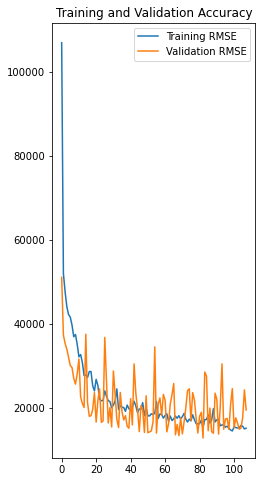

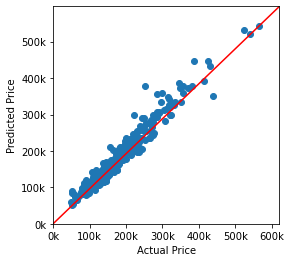

In [49]:
history = best_history

train_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_rmse, label='Training RMSE')
plt.plot(epochs_range, val_rmse, label='Validation RMSE')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')


'''How far are predictions from real values?'''
from matplotlib.ticker import FuncFormatter

def format_tick_labels(x, pos):
    return '{:.0f}k'.format(x/1000)

predictions = model.predict(test_examples)

xlims = [0, max(test_labels)*1.1]
ylims = [0, max(predictions)*1.1]

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(test_labels, predictions)
ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')

ax.plot(xlims, ylims, 'r-')


### Evaluate on test data

In [18]:
model = create_reg_model()
model.load_weights(os.path.join(ckpt_path, "val_rmse_12866.hdf5"))

loss, acc = model.evaluate(test_examples, test_labels)

print('\nevaluation on test set:\nloss (RMSE) = {:.5f}'.format(loss))

14/14 [==============================] - 0s 11ms/step - loss: 13880.7266 - rmse: 13770.8945

evaluation on test set:
loss (RMSE) = 13880.72656


2022-04-30 15:02:24.797010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [52]:
%reset -f